# CUSTOMER SEGMENTATION USING KMEANS CLUSTERING

### Author : Helana Kuriakose

# Problem

Consider a famous mall. This mall wants to gets insight about their customers.They have the data about the customer's behaviour.Thay want to group the customers based on their spending patterns, purchaise behaviour etc.Need to build a system that can cluster customers into different groups such that some group of customers may represent those that tent to purchaise more in that mall, where some other group of customers that don't purchaise that much in that mall.

# WorkFlow

##### 1)	Data collection 

##### 2)    Data Pre-processing

##### 3)	Data Analysis

##### 4)	Choose optimum number of clusters using WCSS

##### 5)	K Means Clustering Model

##### 6)	Visualizing the Clusters

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data analysis and Visualization

In [2]:
# loading the dataset into pandas dataframe

customer_df = pd.read_csv('F:\python\Mall_Customers.csv')

In [3]:
# first 5 records of dataframe

customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding numbers of rows and columns

customer_df.shape

(200, 5)

In [5]:
# getting more insight about the dataframe

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# getting the feature names

customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# checking null values

customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# checking duplicate values

customer_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [9]:
customer_df.duplicated().sum()

0

While we checking the dataset, customer ID, Gender and Age are not that much affecting the purchasing behaviour of the customer.So we are eliminating those features and choosing Annual Income and Spending score alone.

In [10]:
x = customer_df.iloc[:,[3,4]].values

In [11]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Choosing the optimum number of clusters

We need to find the optimum number of clusters.For choosing the number of clusters, we are using the parameter WCSS(Within Clusters Sum of Squares).In this we find the distance of the datapoints from the centeroid.It should be minimum.

In [12]:
# finding WCSS for different number of clusters
# for 10 clusters

from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 3)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

In [13]:
WCSS

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25022.485004530332,
 22842.004653460128,
 19657.783608703947]

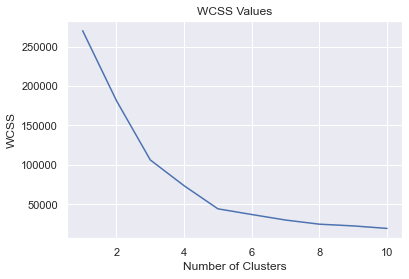

In [14]:
# plot the elbow graph to see which number of clusters has the minimum WCSS values

sb.set()  # gives basic parameters of the graph
plt.plot(range(1,11), WCSS)
plt.title('WCSS Values')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters is 5.

# Model training

In [15]:
# training the K-Means clustering model

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 13)

In [16]:
# return a label for each data points based on their clusters

y = kmeans.fit_predict(x)

In [17]:
y

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

# Visualizing the clusters

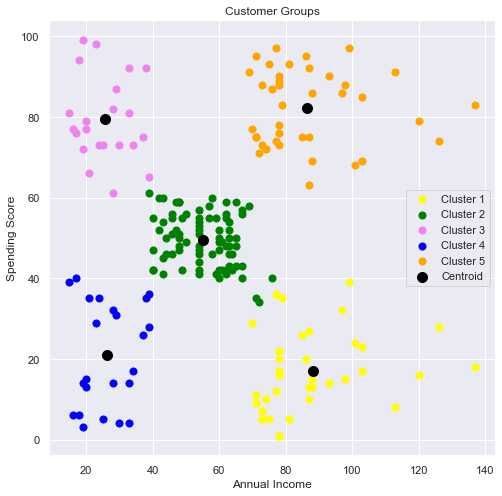

In [18]:
# plotting the datapoints and centroids

plt.figure(figsize=(8,8))
plt.scatter(x = x[y==0,0], y = x[y==0,1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(x = x[y==1,0], y = x[y==1,1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(x = x[y==2,0], y = x[y==2,1], s = 50, c = 'violet', label = 'Cluster 3')
plt.scatter(x = x[y==3,0], y = x[y==3,1], s = 50, c = 'blue', label = 'Cluster 4')
plt.scatter(x = x[y==4,0], y = x[y==4,1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c ='black', label = 'Centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Making a predictive System

In [19]:
annual_income = 80
spending_score = 50
input_data =(annual_income,spending_score)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = kmeans.predict(input_data_reshaped)

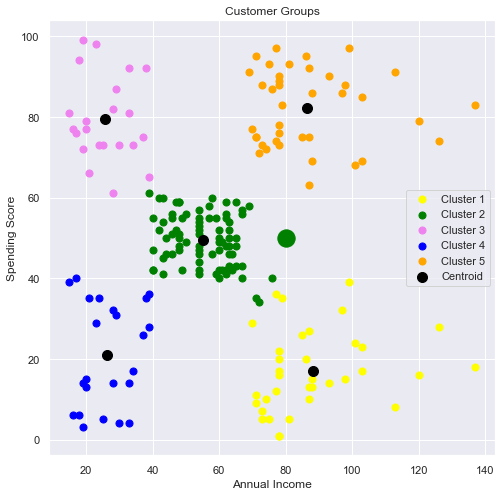

In [20]:
# plotting the predicted values

col = ''
if(prediction == 0):
    col = 'yellow'
elif(prediction == 1):
    col = 'green'
elif(prediction == 2):
    col = 'violet'
elif(prediction == 3):
    col = 'blue'
elif(prediction == 4):
    col = 'orange'

    

plt.figure(figsize=(8,8))
plt.scatter(x = x[y==0,0], y = x[y==0,1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(x = x[y==1,0], y = x[y==1,1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(x = x[y==2,0], y = x[y==2,1], s = 50, c = 'violet', label = 'Cluster 3')
plt.scatter(x = x[y==3,0], y = x[y==3,1], s = 50, c = 'blue', label = 'Cluster 4')
plt.scatter(x = x[y==4,0], y = x[y==4,1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c ='black', label = 'Centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.scatter(x = annual_income, y = spending_score, c = col, s = 300)